In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import sqrt, log, exp
import scipy.stats as sc
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster.hierarchy import cophenet, inconsistent, maxRstat
from scipy.spatial.distance import pdist
from scipy import stats
import numpy as np 
from sklearn import datasets,metrics
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA


# Primary analysis

Opening files

In [5]:
redwine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-red.csv",sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
whitewine = pd.read_csv("C:/Users/cerfi/OneDrive/Bureau/ISEP/A2/DataAnalysis/Projet/wine quality/winequality-white.csv",sep=";")
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Describing files

In [161]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [162]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Checking for missing values

In [18]:
print("Checking missing values for red wine")
print()
print("Missing data for Fixed acidity :" , redwine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , redwine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , redwine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , redwine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , redwine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , redwine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , redwine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , redwine["density"].isnull().sum())
print("Missing data for pH :" , redwine["pH"].isnull().sum())
print("Missing data for Sulphates :" , redwine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , redwine["alcohol"].isnull().sum())
print("Missing data for quality :" , redwine["quality"].isnull().sum())

Checking missing values for red wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


In [19]:
print("Checking missing values for white wine")
print()
print("Missing data for Fixed acidity :" , whitewine["fixed acidity"].isnull().sum())
print("Missing data for volatile acidity :" , whitewine["volatile acidity"].isnull().sum())
print("Missing data for Citric acid :" , whitewine["citric acid"].isnull().sum())
print("Missing data for residual sugar :" , whitewine["residual sugar"].isnull().sum())
print("Missing data for Chlorides :" , whitewine["chlorides"].isnull().sum())
print("Missing data for Free sulfur dioxide :" , whitewine["free sulfur dioxide"].isnull().sum())
print("Missing data for Total sulfur dioxide :" , whitewine["total sulfur dioxide"].isnull().sum())
print("Missing data for Density :" , whitewine["density"].isnull().sum())
print("Missing data for pH :" , whitewine["pH"].isnull().sum())
print("Missing data for Sulphates :" , whitewine["sulphates"].isnull().sum())
print("Missing data for Alcohol :" , whitewine["alcohol"].isnull().sum())
print("Missing data for quality :" , whitewine["quality"].isnull().sum())

Checking missing values for white wine

Missing data for Fixed acidity : 0
Missing data for volatile acidity : 0
Missing data for Citric acid : 0
Missing data for residual sugar : 0
Missing data for Chlorides : 0
Missing data for Free sulfur dioxide : 0
Missing data for Total sulfur dioxide : 0
Missing data for Density : 0
Missing data for pH : 0
Missing data for Sulphates : 0
Missing data for Alcohol : 0
Missing data for quality : 0


Quality of wine

C:\Users\cerfi\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

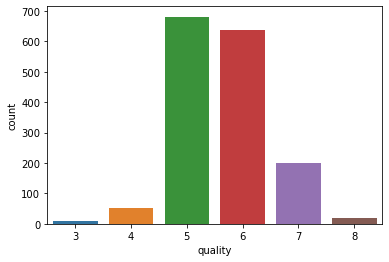

In [37]:
sns.countplot(redwine['quality'])
redwine['quality'].value_counts()

Text(0, 0.5, 'Number of wines')

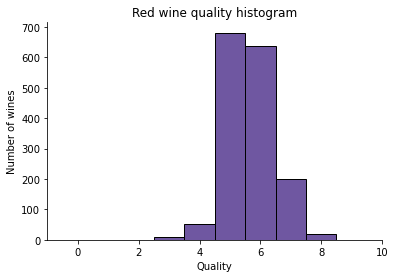

In [86]:
plt.hist(redwine["quality"], edgecolor = "black", color = "#6F57A1", bins=[0,1,2,3,4,5,6,7,8,9,10], align="left")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) 

plt.title("Red wine quality histogram")
plt.xlabel("Quality")
plt.ylabel("Number of wines")

Text(0.5, 1.0, 'Red wine quality repartition')

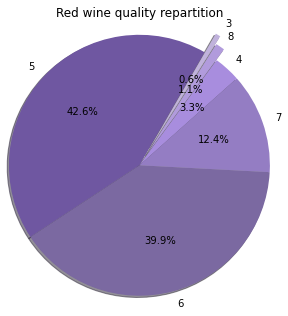

In [124]:
labels = [5,6,7,4,8,3]
quality_values = redwine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#6F57A1", "#7B69A1","#947DC3", "#A88DDE", "#B19BDC", "#C0B2DC"], explode=[0,0,0,0,0.15,0.25], shadow=True, startangle = 60, radius =1.5)
plt.title("Red wine quality repartition", pad=40)

Text(0, 0.5, 'Number of wines')

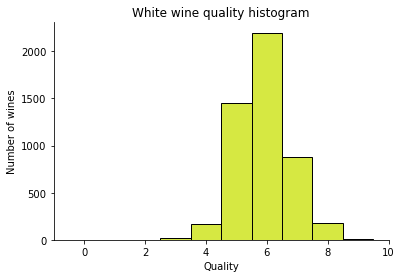

In [114]:
plt.hist(whitewine["quality"], edgecolor = "black", color = "#D6E842", bins=[0,1,2,3,4,5,6,7,8,9,10], align="left")

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("White wine quality histogram")
plt.xlabel("Quality")
plt.ylabel("Number of wines")

Text(0.5, 1.0, 'White wine quality repartition')

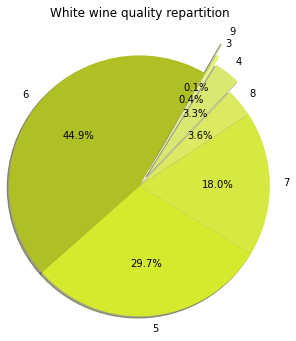

In [127]:
labels = [6,5,7,8,4,3,9]
quality_values = whitewine["quality"].value_counts(normalize='True')
plt.pie(quality_values, labels = labels, autopct='%1.1f%%', colors = ["#AFBF24", "#D5E92D","#D6E842", "#DBEA62", "#DAE770", "#EAF879", "#EFF9A4"], explode=[0,0,0,0,0.15,0.25,0.4], shadow=True, startangle=60, radius = 1.5)
plt.title("White wine quality repartition", pad=60)

Detecting quality outliers

In [150]:
out=[]

out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
print("Red Wine quality outlier")
ZRscore_outlier(redwine['quality'])

print("White Wine quality outlier")
ZRscore_outlier(whitewine['quality'])

Red Wine quality outlier
Outliers: []
White Wine quality outlier
Outliers: []


In [184]:
wine_mean = {'color': ['red','white'], 'mean_quality': [redwine["quality"].mean(),whitewine["quality"].mean()]}
table_wine_mean = pd.DataFrame(data=wine_mean)
table_wine_mean

,color,mean_quality
0,red,5.636023
1,white,5.877909


# Is there wine out of regulation ?

Wine ph (recommanded)

Text(0.5, 1.0, 'Red wine pH and limitations')

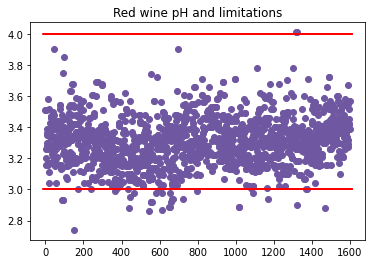

In [252]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
ph_highLimit = np.linspace(start=4,stop=4,num=1599)
ph_lowLimit = np.linspace(start=3,stop=3,num=1599)

plt.scatter(number_redWine, redwine["pH"], color = "#6F57A1")
plt.scatter(number_redWine, ph_highLimit, color = "red", marker = "_")
plt.scatter(number_redWine, ph_lowLimit, color = "red", marker = "_")
plt.title("Red wine pH and limitations")

Text(0.5, 1.0, 'White wine pH and limitations')

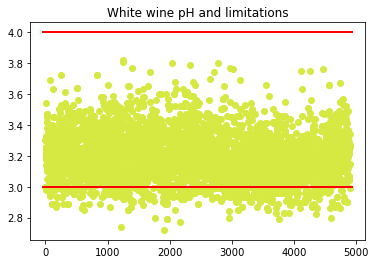

In [234]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
ph_highLimit = np.linspace(start=4,stop=4,num=4898)
ph_lowLimit = np.linspace(start=3,stop=3,num=4898)

plt.scatter(number_whitewine, whitewine["pH"], color = "#D6E842")
plt.scatter(number_whitewine, ph_highLimit, color = "red", marker = "_")
plt.scatter(number_whitewine, ph_lowLimit, color = "red", marker = "_")
plt.title("White wine pH and limitations")

Text(0.5, 1.0, 'White wine pH and limitations')

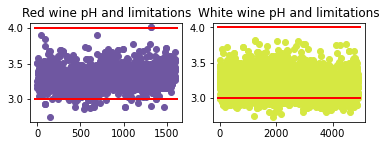

In [251]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
ph_highLimit = np.linspace(start=4,stop=4,num=1599)
ph_lowLimit = np.linspace(start=3,stop=3,num=1599)


plt.subplot(2,2,1)
plt.scatter(number_redWine, redwine["pH"], color = "#6F57A1")
plt.scatter(number_redWine, ph_highLimit, color = "red", marker = "_")
plt.scatter(number_redWine, ph_lowLimit, color = "red", marker = "_")
plt.title("Red wine pH and limitations")


number_whitewine = np.linspace(start=0,stop=4898,num=4898)
ph_highLimit = np.linspace(start=4,stop=4,num=4898)
ph_lowLimit = np.linspace(start=3,stop=3,num=4898)

plt.subplot(2,2,2)
plt.scatter(number_whitewine, whitewine["pH"], color = "#D6E842")
plt.scatter(number_whitewine, ph_highLimit, color = "red", marker = "_")
plt.scatter(number_whitewine, ph_lowLimit, color = "red", marker = "_")
plt.title("White wine pH and limitations")

Sulfuric rates & limitations

Text(0.5, 1.0, 'Red wine sulfuric limitations')

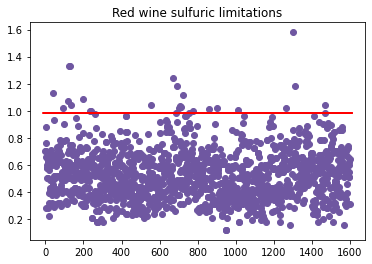

In [257]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
sulfuric_highLimit = np.linspace(start=0.98,stop=0.98,num=1599)

plt.scatter(number_redWine, redwine["volatile acidity"], color = "#6F57A1")
plt.scatter(number_redWine, sulfuric_highLimit, color = "red", marker = "_")
plt.title("Red wine sulfuric limitations")

Text(0.5, 1.0, 'White wine sulfuric limitations')

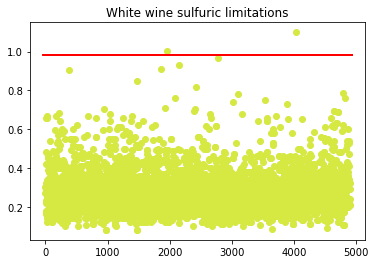

In [256]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
sulfuric_highLimit = np.linspace(start=0.98,stop=0.98,num=4898)

plt.scatter(number_whitewine, whitewine["volatile acidity"], color = "#D6E842")
plt.scatter(number_whitewine, sulfuric_highLimit, color = "red", marker = "_")
plt.title("White wine sulfuric limitations")

Alcohol recommendations

Text(0.5, 1.0, 'Red wine alcohol recommendation')

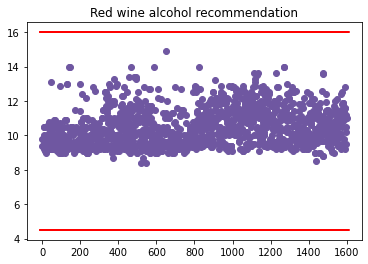

In [8]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
alcohol_highLimit = np.linspace(start=16,stop=16,num=1599)
alcohol_lowLimit = np.linspace(start=4.5,stop=4.5,num=1599)

plt.scatter(number_redWine, redwine["alcohol"], color = "#6F57A1")
plt.scatter(number_redWine, alcohol_highLimit, color = "red", marker = "_")
plt.scatter(number_redWine, alcohol_lowLimit, color = "red", marker = "_")
plt.title("Red wine alcohol recommendations")

Text(0.5, 1.0, 'White wine alcohol recommendations')

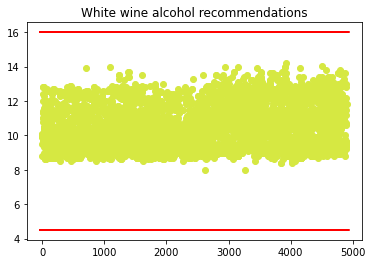

In [9]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
alcohol_highLimit = np.linspace(start=16,stop=16,num=4898)
alcohol_lowLimit = np.linspace(start=4.5,stop=4.5,num=4898)

plt.scatter(number_whitewine, whitewine["alcohol"], color = "#D6E842")
plt.scatter(number_whitewine, alcohol_highLimit, color = "red", marker = "_")
plt.scatter(number_whitewine, alcohol_lowLimit, color = "red", marker = "_")
plt.title("White wine alcohol recommendations")

Total sulfur dioxide

Text(0.5, 1.0, 'Red wine total sulfure dioxide')

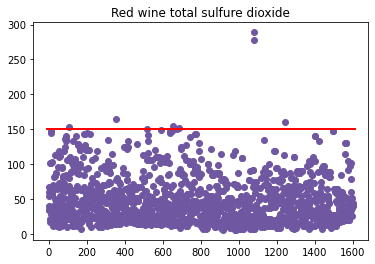

In [15]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
TSD_highLimit = np.linspace(start=150,stop=150,num=1599)

plt.scatter(number_redWine, redwine["total sulfur dioxide"], color = "#6F57A1")
plt.scatter(number_redWine, TSD_highLimit, color = "red", marker = "_")
plt.title("Red wine total sulfure dioxide")

Text(0.5, 1.0, 'White wine total sulfure dioxide')

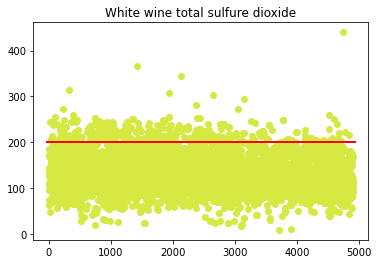

In [16]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
TSD_highLimit = np.linspace(start=200,stop=200,num=4898)

plt.scatter(number_whitewine, whitewine["total sulfur dioxide"], color = "#D6E842")
plt.scatter(number_whitewine, TSD_highLimit, color = "red", marker = "_")
plt.title("White wine total sulfure dioxide")

Density limitations

Text(0.5, 1.0, 'Red wine density')

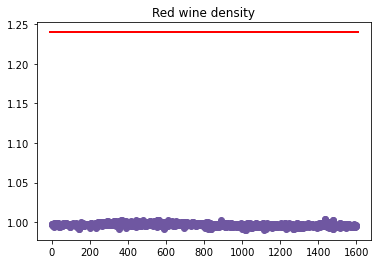

In [13]:
number_redWine = np.linspace(start=0,stop=1599,num=1599)
density_highLimit = np.linspace(start=1.24,stop=1.24,num=1599)

plt.scatter(number_redWine, redwine["density"], color = "#6F57A1")
plt.scatter(number_redWine, density_highLimit, color = "red", marker = "_")
plt.title("Red wine density")

Text(0.5, 1.0, 'White wine density')

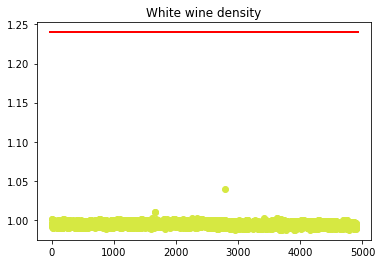

In [14]:
number_whitewine = np.linspace(start=0,stop=4898,num=4898)
density_highLimit = np.linspace(start=1.24,stop=1.24,num=4898)

plt.scatter(number_whitewine, whitewine["density"], color = "#D6E842")
plt.scatter(number_whitewine, density_highLimit, color = "red", marker = "_")
plt.title("White wine density")

# Analysis of quality depending on attributes

Quality vs fixed acidity

Text(0.5, 1.0, 'Red wine fixed acidity vs quality')

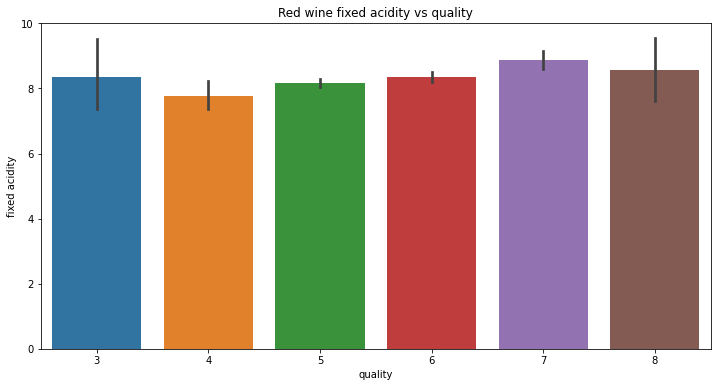

In [44]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = redwine)
plt.title("Red wine fixed acidity vs quality")

Text(0.5, 1.0, 'White wine fixed acidity vs quality')

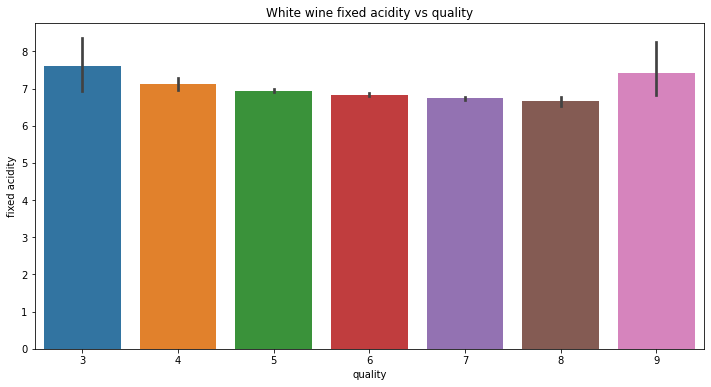

In [43]:
fig = plt.figure(figsize = (12,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = whitewine)
plt.title("White wine fixed acidity vs quality")

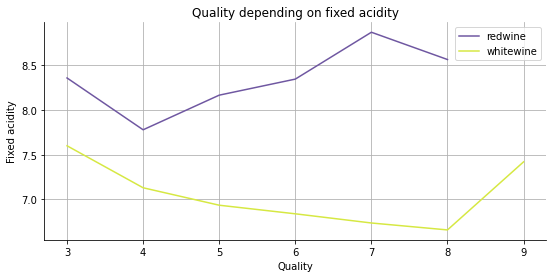

In [79]:
#We define the labels that we'll drop
labels = ["volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_FA = redwine.copy()
whitewineQ_FA = whitewine.copy()

redwineQ_FA = redwineQ_FA.drop(columns=labels)
whitewineQ_FA = whitewineQ_FA.drop(columns=labels)

#We plot the quality depending on fixed acidity for the white and red wines
fig = plt.figure(figsize = (9,4))
redwineQ_FA_plot, =plt.plot(redwineQ_FA.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_FA_plot, =plt.plot(whitewineQ_FA.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_FA_plot, whitewineQ_FA_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Fixed acidity")
plt.title("Quality depending on fixed acidity")
plt.grid()

Quality vs volatile acidity

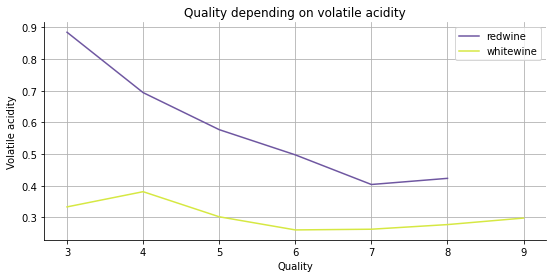

In [82]:
#We define the labels that we'll drop
labels = ["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_VA = redwine.copy()
whitewineQ_VA = whitewine.copy()

redwineQ_VA = redwineQ_VA.drop(columns=labels)
whitewineQ_VA = whitewineQ_VA.drop(columns=labels)

#We plot the quality depending on fixed acidity for the white and red wines
fig = plt.figure(figsize = (9,4))
redwineQ_VA_plot, =plt.plot(redwineQ_VA.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_VA_plot, =plt.plot(whitewineQ_VA.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_VA_plot, whitewineQ_VA_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Volatile acidity")
plt.title("Quality depending on volatile acidity")
plt.grid()

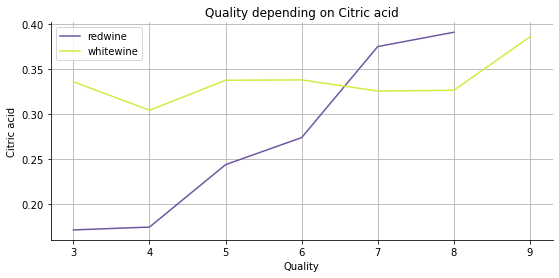

In [85]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_CA = redwine.copy()
whitewineQ_CA = whitewine.copy()

redwineQ_CA = redwineQ_CA.drop(columns=labels)
whitewineQ_CA = whitewineQ_CA.drop(columns=labels)

#We plot the quality depending on fixed acidity for the white and red wines
fig = plt.figure(figsize = (9,4))
redwineQ_CA_plot, =plt.plot(redwineQ_CA.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_CA_plot, =plt.plot(whitewineQ_CA.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_CA_plot, whitewineQ_CA_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Citric acid")
plt.title("Quality depending on Citric acid")
plt.grid()

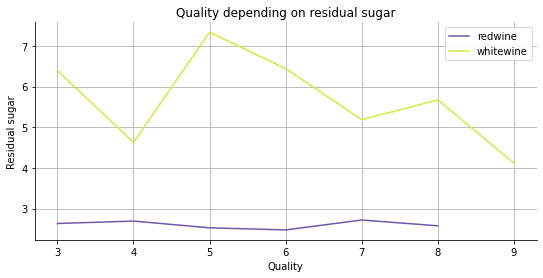

In [86]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_RS = redwine.copy()
whitewineQ_RS = whitewine.copy()

redwineQ_RS = redwineQ_RS.drop(columns=labels)
whitewineQ_RS = whitewineQ_RS.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_RS_plot, =plt.plot(redwineQ_RS.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_RS_plot, =plt.plot(whitewineQ_RS.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_RS_plot, whitewineQ_RS_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Residual sugar")
plt.title("Quality depending on residual sugar")
plt.grid()

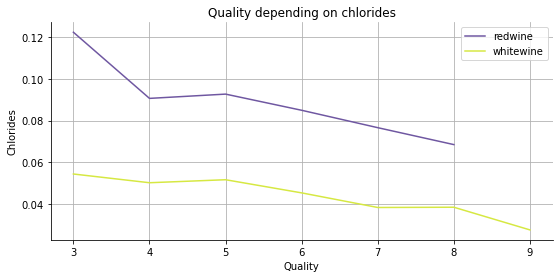

In [87]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_C = redwine.copy()
whitewineQ_C = whitewine.copy()

redwineQ_C = redwineQ_C.drop(columns=labels)
whitewineQ_C = whitewineQ_C.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_C_plot, =plt.plot(redwineQ_C.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_C_plot, =plt.plot(whitewineQ_C.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_C_plot, whitewineQ_C_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Chlorides")
plt.title("Quality depending on chlorides")
plt.grid()

In [ ]:
Quality vs free sulfur dioxide

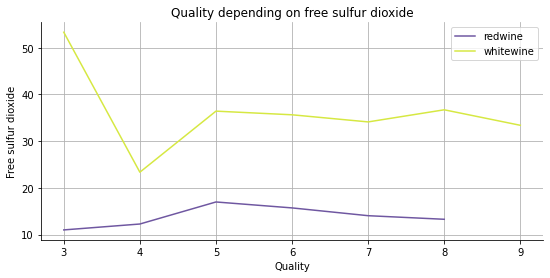

In [88]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "total sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_FSD = redwine.copy()
whitewineQ_FSD = whitewine.copy()

redwineQ_FSD = redwineQ_FSD.drop(columns=labels)
whitewineQ_FSD = whitewineQ_FSD.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_FSD_plot, =plt.plot(redwineQ_FSD.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_FSD_plot, =plt.plot(whitewineQ_FSD.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_FSD_plot, whitewineQ_FSD_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Free sulfur dioxide")
plt.title("Quality depending on free sulfur dioxide")
plt.grid()

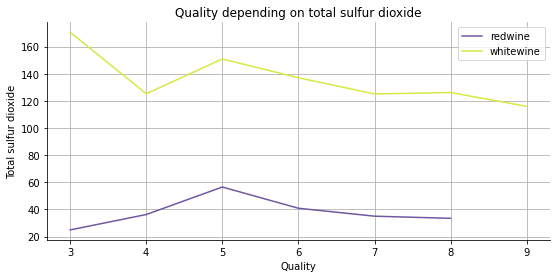

In [90]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","density","pH","sulphates","alcohol"]

redwineQ_TSD = redwine.copy()
whitewineQ_TSD = whitewine.copy()

redwineQ_TSD = redwineQ_TSD.drop(columns=labels)
whitewineQ_TSD = whitewineQ_TSD.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_TSD_plot, =plt.plot(redwineQ_TSD.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_TSD_plot, =plt.plot(whitewineQ_TSD.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_TSD_plot, whitewineQ_TSD_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Total sulfur dioxide")
plt.title("Quality depending on total sulfur dioxide")
plt.grid()

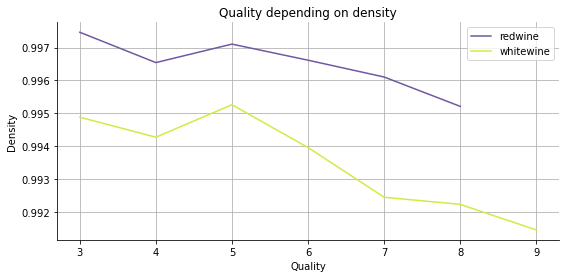

In [91]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","pH","sulphates","alcohol"]

redwineQ_D = redwine.copy()
whitewineQ_D = whitewine.copy()

redwineQ_D = redwineQ_D.drop(columns=labels)
whitewineQ_D = whitewineQ_D.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_D_plot, =plt.plot(redwineQ_D.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_D_plot, =plt.plot(whitewineQ_D.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_D_plot, whitewineQ_D_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Density")
plt.title("Quality depending on density")
plt.grid()

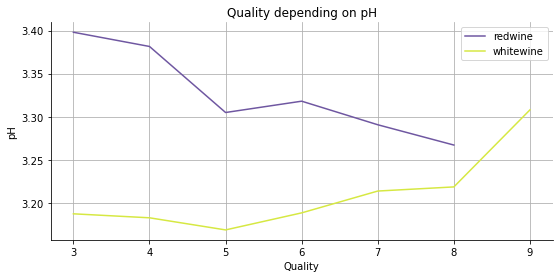

In [92]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","sulphates","alcohol"]

redwineQ_pH = redwine.copy()
whitewineQ_pH = whitewine.copy()

redwineQ_pH = redwineQ_pH.drop(columns=labels)
whitewineQ_pH = whitewineQ_pH.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_pH_plot, =plt.plot(redwineQ_pH.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_pH_plot, =plt.plot(whitewineQ_pH.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_pH_plot, whitewineQ_pH_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("pH")
plt.title("Quality depending on pH")
plt.grid()

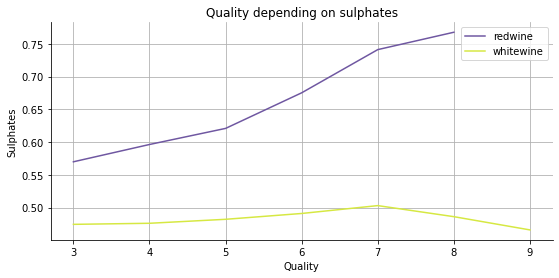

In [93]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","alcohol"]

redwineQ_S = redwine.copy()
whitewineQ_S = whitewine.copy()

redwineQ_S = redwineQ_S.drop(columns=labels)
whitewineQ_S = whitewineQ_S.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_S_plot, =plt.plot(redwineQ_S.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_S_plot, =plt.plot(whitewineQ_S.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_S_plot, whitewineQ_S_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Sulphates")
plt.title("Quality depending on sulphates")
plt.grid()

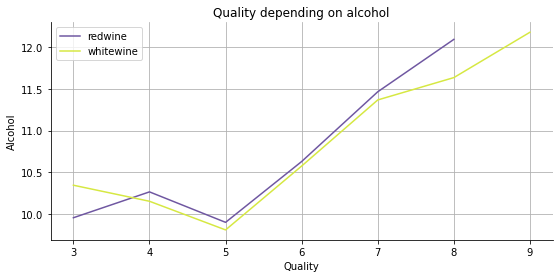

In [94]:
#We define the labels that we'll drop
labels = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
         "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates"]

redwineQ_A = redwine.copy()
whitewineQ_A = whitewine.copy()

redwineQ_A = redwineQ_A.drop(columns=labels)
whitewineQ_A = whitewineQ_A.drop(columns=labels)

fig = plt.figure(figsize = (9,4))
redwineQ_A_plot, =plt.plot(redwineQ_A.groupby(["quality"]).mean(), color='#6F57A1')
whitewineQ_A_plot, =plt.plot(whitewineQ_A.groupby(["quality"]).mean(), color='#D6E842')
plt.legend([redwineQ_A_plot, whitewineQ_A_plot], ['redwine', 'whitewine'])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.title("Quality depending on alcohol")
plt.grid()

Red wine correlation matrix


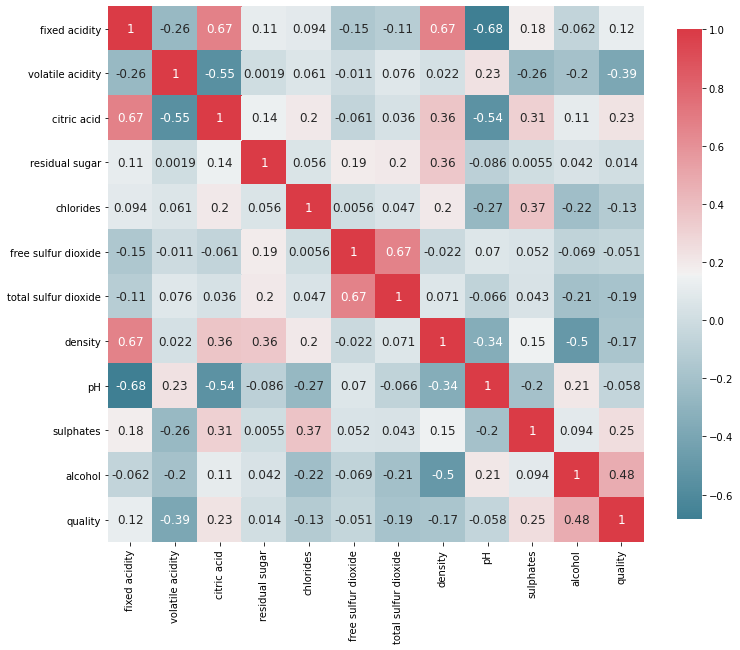

In [45]:
print("Red wine correlation matrix")
corr = redwine.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
    )

White wine correlation matrix


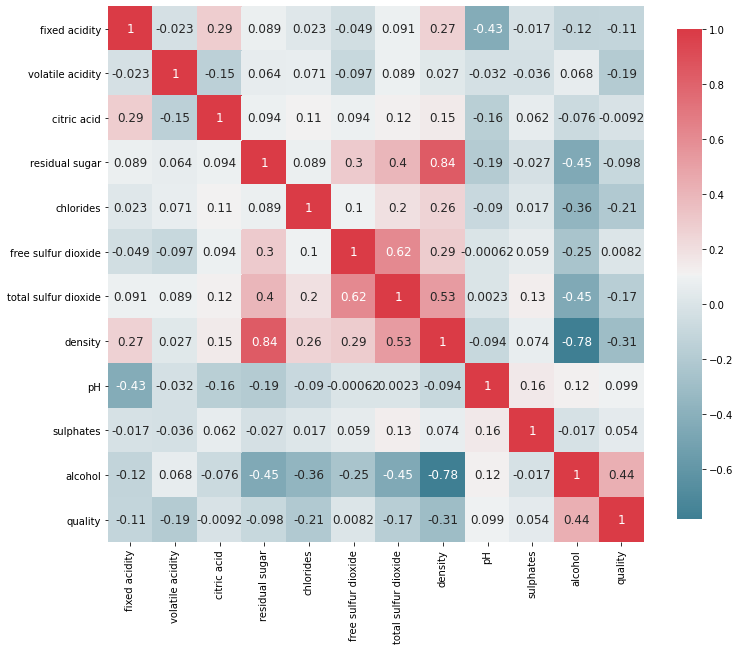

In [46]:
print("White wine correlation matrix")
corr = whitewine.corr()
_ , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(
    corr, 
    cmap = cmap,
    square=True, 
    cbar_kws={ 'shrink' : .9 }, 
    ax=ax, 
    annot = True, 
    annot_kws = { 'fontsize' : 12 }
    )